In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import streamlit as st
import seaborn as sns


## data download

In [67]:
df = pd.read_csv('prepared.csv')

df.dtypes

titles                object
author                object
number_of_reviews      int64
number_of_ratings      int64
average_rating       float64
number_of_pages        int64
first_published        int64
series                  bool
genres                object
url                   object
cover_url             object
length                object
rating_range          object
dtype: object

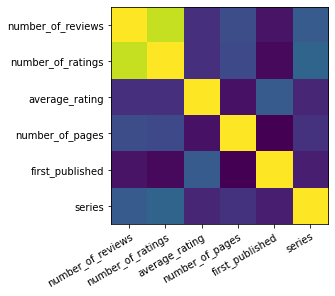

In [35]:
def heatmap(dataset):
    data = dataset.corr()
    ax=plt.gca()
    labels = data.columns
    ax.set_xticks(np.arange(labels.shape[0]),labels.tolist())
    ax.set_yticks(np.arange(labels.shape[0]),labels.tolist())
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")
    ax.imshow(data.values)
    

heatmap(df)

<AxesSubplot:>

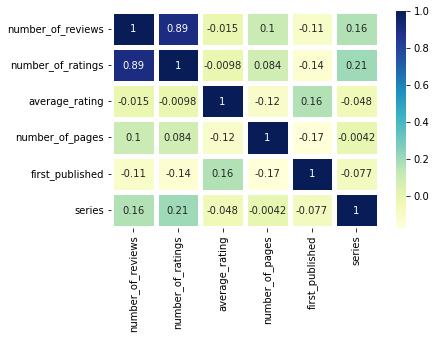

In [45]:
sns.heatmap(df.corr(),annot=True,linewidths=5,cmap="YlGnBu")

In [ ]:
df.columns

Index(['titles', 'author', 'number_of_reviews', 'number_of_ratings',
       'average_rating', 'number_of_pages', 'first_published', 'series',
       'genres', 'url', 'cover_url', 'length', 'rating_range'],
      dtype='object')

# scatter plots

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
def scatter(x,y,color,title):
        ordinal = OrdinalEncoder()
        #encoding values, to use them as the color
        c = ordinal.fit_transform(color.copy().values.reshape(-1,1))
        print(color.unique())
        fig, ax = plt.subplots()
        scat =ax.scatter(x,y,c=c)
        ax.set_title(title)

['medium' 'short' 'long' 'very long' 'very short']
['very good' 'good' 'excellent' 'bad' 'very bad']


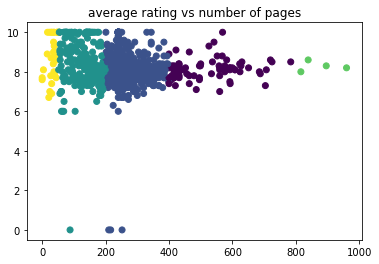

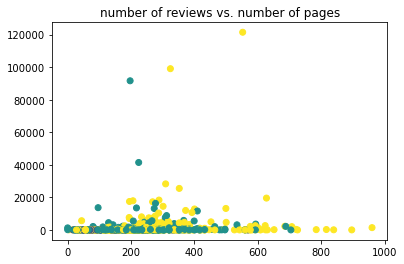

In [ ]:
scatter(df.number_of_pages,df.average_rating,df.length,'average rating vs number of pages')
scatter(df.number_of_pages,df.number_of_reviews,df.rating_range,'number of reviews vs. number of pages')

## plotly scatter

In [ ]:
def scatter(dataset,title,x_column,x_title,y_column,y_title,color_column,legend_title):
    fig = px.scatter(dataset, x=x_column, y=y_column, color=color_column)
    fig.update_layout(
    title=title,
    xaxis_title=x_title,
    yaxis_title=y_title,
    legend_title=legend_title,
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ) )
    fig.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        legend={
        'yanchor': 'top'})

    fig.show()

In [ ]:
scatter('number of pages vs. ratings','number_of_pages','number of book pages','number_of_ratings','number of given ratings','rating_range','rating')

TypeError: scatter() missing 1 required positional argument: 'legend_title'

## pie charts

In [ ]:
def pies(dataset,title,legend):
    df['count'] =1
    fig =  px.pie(dataset,values='count',names='rating_range')
    fig.update_layout(
    title=title,
    legend_title=legend,
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ) )
    fig.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        legend={
        'yanchor': 'top'})
    fig.show()

In [ ]:
pies('shares of books according to the review','reviews')

In [ ]:
def scatter_3d(dataset,title,x_col,x_title,y_col,y_title,z_col,z_title,color,legend_title):
    fig = px.scatter_3d(dataset,x=x_col,y=y_col,z=z_col,color=color)
    fig.update_layout(
    title=title,
    legend_title=legend_title,
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ) )
    fig.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        legend={
        'yanchor': 'top'})
        
    fig.update_layout(scene = dict(
                    xaxis_title=x_title,
                    yaxis_title=y_title,
                    zaxis_title=z_title))
    fig.show()
scatter_3d('average rating vs num. pages, number of reviews',
            'average_rating','average rating',
            'number_of_pages','number of pages',
            'number_of_reviews', 'number of reviews',
            'rating_range','rating')

In [92]:
# df.pivot_table('average_rating','first_published',aggfunc='count').sort_values(by='average_rating',ascending=False)


Index(['titles', 'author', 'number_of_reviews', 'number_of_ratings',
       'average_rating', 'number_of_pages', 'first_published', 'series',
       'genres', 'url', 'cover_url', 'length', 'rating_range', 'books'],
      dtype='object')
